# Analytics Oasis Day 3 - Hypothesis testing
## GROUP aPPLE
### Your challenge for today is to develop and test a hypothesis using an existing data set

To successfully complete this challenge, you will need to: 
    
1. Import the appropriate libraries
2. Load up the data set
3. "Eyeball" the data
4. Develop a hypothesis
5. Give a theoretical basis for that hypothesis, with literature
6. Perform a statistical analysis
7. Determine whether you find in favour of the hypothesis, or against the hypothesis. You may find for the null hypothesis.
8. Answer the **interpretation question**


## 1. Import the appropriate libraries

We need to load up libraries first. 

Normally, we should try to be parsimonious and do as much as possible in base Python. But we are going to need a few for this assignment, especially as you only have today to complete this!

In [52]:
# your code goes here
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
from io import StringIO


try:
    import stargazer
    print("Stargazer is already installed.")
except ImportError:
    print("Stargazer is not installed. Installing now...")
    !pip install stargazer

from stargazer.stargazer import Stargazer

Stargazer is already installed.


## 2. Load up the data set

Now we'll load the data. In this case, I've put them on the __Harvard Dataverse__, so we'll load them directly from there.


In [53]:
# your code goes here
file_url = 'https://dataverse.harvard.edu/api/access/datafile/8154556'

response = requests.get(file_url)
response.raise_for_status()

# we'll call the data frame 'cc'
# (short for Chat Chip, the pseudonym of the author
# of a book about fish and chips)

cc = pd.read_csv(StringIO(response.text), sep='\t')

# now check to see if the data have downloaded
# and been passed to the data frame

if cc.empty: 
    print("Data not loaded.")
else: 
    print("Data successfully loaded.")

# if the above doesn't work, you can download
# manually from here: 
# https://doi.org/10.7910/DVN/SIGCJ1

Data successfully loaded.


## 3. "Eyeball" the data

Ok, what are we actually looking at here? Let's take a look to see what we've got.

In [54]:
print('Number of variables:   ', len(cc.columns))

# and how many rows of data do we have? 

print('Number of rows of data:', len(cc))
print("(That's one row for each UK parliamentary constituency)") 

# let's see the variable names 

print('\nVariable names: ') 

list(cc.columns)

Number of variables:    490
Number of rows of data: 650
(That's one row for each UK parliamentary constituency)

Variable names: 


['PCON11CD',
 'cName',
 'country',
 'region',
 'IndianRestaurants',
 'ItalianRestaurants',
 'ChineseRestaurants',
 'PubRestaurants',
 'SpecialityRestaurants',
 'TraditionalRestaurants',
 'EnglishRestaurants',
 'FishandChipShopsandRestaurants',
 'FastFoodRestaurants',
 'ThaiRestaurants',
 'EuropeanRestaurants',
 'ModernCuisineRestaurants',
 'MediterraneanRestaurants',
 'SeafoodRestaurants',
 'AmericanRestaurants',
 'TurkishRestaurants',
 'HotelRestaurants',
 'PortugueseRestaurants',
 'JapaneseRestaurants',
 'FrenchRestaurants',
 'AfricanRestaurants',
 'MexicanRestaurants',
 'SteakhouseRestaurants',
 'CaribbeanRestaurants',
 'SpanishRestaurants',
 'MiddleEasternRestaurants',
 'GreekRestaurants',
 'LebaneseRestaurants',
 'VegetarianRestaurants',
 'Bistros',
 'NepaleseRestaurants',
 'BangladeshiRestaurants',
 'Pizzerias',
 'PersianRestaurants',
 'PizzaDeliveryandTakeaway',
 'KoreanRestaurants',
 'IndianTakeaways',
 'MoroccanRestaurants',
 'PolishRestaurants',
 'ScottishRestaurants',
 'Indo

### Let's look at some variables

You need to look at something different to fish and chips!

Are you looking at the appropriate variables (count, quote)? 

Do you need to recode (e.g., as percentages)?

In [55]:
# your code goes here
# restaurantDiversity vs con17
print(cc['con17'].describe())
print(cc['restaurantDiversity'].describe())

count    650.000000
mean      41.329319
std       16.727358
min        0.000000
25%       28.463438
50%       44.336327
75%       55.403462
max       69.917520
Name: con17, dtype: float64
count    650.000000
mean       5.366954
std        1.177343
min        2.747604
25%        4.551089
50%        5.203573
75%        5.988839
max        9.774035
Name: restaurantDiversity, dtype: float64


## 4. Develop a hypothesis

So you need to have a hypothesis. For me, it's going to be this: 

 - __H1__: The larger the percentage of votes for the conservative party in a constituency, there is less resteraunt diversity
                                                                                                                                                             
                                                        

## 5. Give a theoretical basis for that hypothesis, with literature

To be able to provide a theoretical foundation for the hypothesis that "the larger the percentage of votes for the conservative party in a constituency, the less restaurant diversity there is," several sociological theories can be considered.

### Sources cited  

 - Source 1. Johnson, A., & Roberto, K. J. (2019). Elections and Selection: The Role of Political Ideology in Selection Decisions
 
 - Source 2. Shrikant, N., & Musselwhite, J. (2018). Indexing Neoliberal Ideology and Political Identities in a Racially Diverse Business Community
 
 - Source 3. Swigart, K. L., Anantharaman, A., Williamson, J. A., & Grandey, A. (2020). Working While Liberal/Conservative: A Review of Political Ideology in Organizations

 - Source 4. Maclean, M., Harvey, C., Suddaby, R., & O'Gorman, K. (2018). Political Ideology and the Discursive Construction of the Multinational Hotel Industry

 - Source 5. Guidetti, M., Carraro, L., & Cavazza, N. (2022). Dining with liberals and conservatives: The social underpinnings of food neophobia. PloS one, 17(1), e0262676.

 - Source 6. Alesina, A., & La Ferrara, E. (2000). Participation in heterogeneous communities. The quarterly journal of economics, 115(3), 847-904.
 
 (etc.)

## 6. Perform a statistical analysis

### Correlation

For the analysis, a good place to start is with a correlation. Two things to remember: 
    
1. Correlation does not equal causation. 
2. In the social sciences, if you are north of 0.3, you might be on to something.

In [56]:
# your code goes here
print('Correlation between : restaurantDiversity and con17')
print(cc['restaurantDiversity'].corr(cc['con17']))

Correlation between : restaurantDiversity and con17
-0.03839601204950036


### Scatterplot

We can get a much better understanding of the relationship if we can visualise it. 

So let's create a scatterplot, and we'll even put a regression line in. 

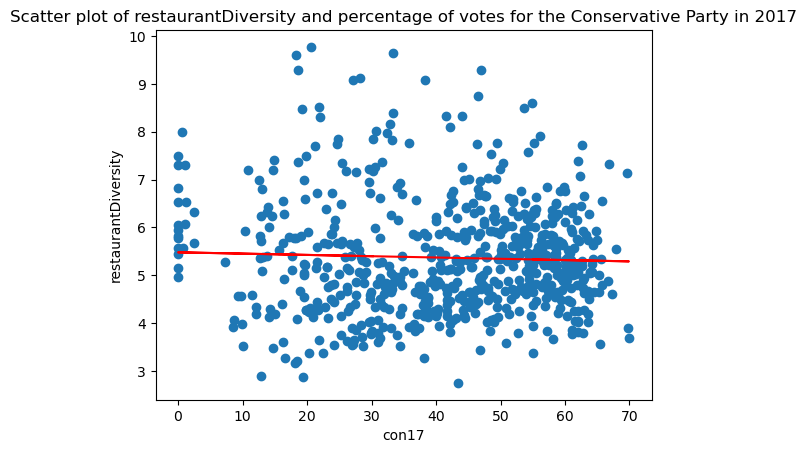

In [57]:
# your code goes here
x = cc['con17']
y = cc['restaurantDiversity']
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x, y = x[mask], y[mask]

plt.scatter(x, y)
plt.title('Scatter plot of restaurantDiversity and percentage of votes for the Conservative Party in 2017')
plt.xlabel('con17')
plt.ylabel('restaurantDiversity')

slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# add the line to the plot 

plt.plot(x, line, color='red')

# render the scatter plot

plt.show()

### Regression models

Let's run two models. 

 - The first base model will be __based on two variables__: it will just have one dependent variable (brexitShare) and one independent variable (fishPC)
 - The second model will be __based on multiple variables__: it will have lots of other theoretically appropriate control variables


### Simplify this

Python is what is known as a 'verbose' language, and its libraries are equally verbose. 

Put another way, it talks too much. We're getting a lot of unnecessary information here. Let's simplify it with Stargazer. 

In [65]:
# your code goes here
model1 = smf.ols('restaurantDiversity ~ con17', data=cc).fit()
print(model1.summary())
star1 = Stargazer([model1])
star1

                             OLS Regression Results                            
Dep. Variable:     restaurantDiversity   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9567
Date:                 Wed, 05 Feb 2025   Prob (F-statistic):              0.328
Time:                         19:19:47   Log-Likelihood:                -1027.4
No. Observations:                  650   AIC:                             2059.
Df Residuals:                      648   BIC:                             2068.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4786      0.123     44.47

In [85]:
model2 = smf.ols('restaurantDiversity ~ con17 + c11EthnicityWhite + c11Christian + c11EnglishAll + c11HouseholdMarriedDependents + c11IndustryProfessional + c11QualLevel4', data=cc).fit()
print(model2.summary())
star2 = Stargazer([model2])
star2

                             OLS Regression Results                            
Dep. Variable:     restaurantDiversity   R-squared:                       0.393
Model:                             OLS   Adj. R-squared:                  0.385
Method:                  Least Squares   F-statistic:                     52.21
Date:                 Wed, 05 Feb 2025   Prob (F-statistic):           2.50e-57
Time:                         19:48:50   Log-Likelihood:                -754.56
No. Observations:                  573   AIC:                             1525.
Df Residuals:                      565   BIC:                             1560.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Inte

## 7. Determine whether you find in favour of the hypothesis, or against the hypothesis. You may find for the null hypothesis.

In this case, we find for the null hypothesis. Here's why: 

 - There is no significant correlation between the two variable (-0.038, very low).
 - Low R-squared = 0.001, explaining only 0.001 precent of the population.
 - P-value > 0.1, indicating low credibility.
 - In the base model, if we increase the 'percentage of people voting for the conservatives party in 2017' by 1 percent, the restaurant diversity will increase by -0.003 percent.
 - When we introduce other variables, con17 ('percentage of people voting for the conservatives party in 2017') isn't significant at all.

## 8. Answer the **interpretation question**

The regression table gave us an R-squared value, and the variables have coefficients and standard errors. What can these tell us about how well your model worked? 

Your narrative goes here. Yes, ChatGPT could write it for you. But it would be very obvious. If you want to use an LLM to help you understand the numbers, please do! I do it all of the time! But at least re-phrase what it says!